# LEAD SCORING - CASE STUDY

In [163]:
#Suppressing Warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [164]:
# Importing the necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## 1. Reading and Data Inspection 

In [165]:
#Reading the 'lead_df.csv' file into the notebook
lead_df= pd.read_csv("leads.csv") 
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [166]:
# Checking the shape of the dataframe 
lead_df.shape

(9240, 37)

Thus, this dataframe contains 37 columns with 9240 entries each. Since the problem statement requires us to build a logistic regression model that predicts possible suucesful lead for the sales team to pursue, the following columns that are generated by the sales team will not be useful and hence we need to drop them. The columns generated by the sales team that need to be dropped are,

1. Tags
2. Lead Quality
3. Asymmetrique Activity Index
4. Asymmetrique Profile Index
5. Asymmetrique Profile Score
6. Asymmetrique Activity Score
7. Last Activity
8. Last Notable Activity
9. Lead Profile

In addition to the above the columns Prospect ID and Lead Number will also not help in assessing the prbabaility of a succesful lead, so we drop them too

In [167]:
# Dropping the 11 columns mentioned above 
columns_to_be_dropped=['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Last Activity','Last Notable Activity','Lead Profile','Lead Number'] 
lead_df.drop(columns_to_be_dropped,axis=1,inplace=True)

In [168]:
#Checking the datframe to see if the columns have been removed 
lead_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [169]:
# Checking the new shape of the dataframe 
lead_df.shape

(9240, 27)

Thus, the columns to be removed have been removed properly

In [170]:
# Checking the data types in each column 
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Country                                        6779 

It can be seen that quite a few columns have missing values, but the data types of each of the columns seem to be appropriate. The missing values will be dealt with in the data cleaning section of the notebook.

In [171]:
# Looking into the statistical summary of the given data 
lead_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


It can be seen that the columns TotalVisits, Total Time Spent on Website and Page Views Per Visit do have some outliers. These will also be looked into in detail in the data cleaning section of this notebook.

## 2. Data Cleaning

### 2.1 Missing Value Treatment

We can see that, Select is not a value but the default option in combo box, if this field is not choosen then that would by default be Select. This can be considered as null value or NAN for time being and can be treated later.

In [172]:
#Replacing 'Select' with 'Nan'

lead_df = lead_df.replace('Select',np.nan)

In [173]:
# Sum of missing values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

There are missing values in few of the attributes. We can check the percentage

In [174]:
# Percentage of missing values
missing_values_percent = round(100*(lead_df.isnull().sum()/len(lead_df.index)),3)
missing_values_percent

Prospect ID                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Country                                          26.634
Specialization                                   36.580
How did you hear about X Education               78.463
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                          0.000
Newspaper Article                                 0.000
X Education Forums                              

We can remove the columns with more than 40% of missing values

In [175]:
#Drop columns with more than 40% missing values
columns_drop = lead_df.columns

for col in columns_drop:
    if((100*(lead_df[col].isnull().sum()/len(lead_df.index))) > 40 ):
        lead_df.drop(col,1,inplace=True)

Check if the columns with more than 40% missing values deleted or not

In [176]:
# Percentage of missing values
missing_values_percent = round(100*(lead_df.isnull().sum()/len(lead_df.index)),3)
missing_values_percent

Prospect ID                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Country                                          26.634
Specialization                                   36.580
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                          0.000
Newspaper Article                                 0.000
X Education Forums                                0.000
Newspaper                                       

We can see, the columns to be deleted are dropped

Missing values can be treated in multiple ways according to context. Now check missing values for each column and treat it appropriately

#### City

In [177]:
#City null values
lead_df.City.isnull().sum()

3669

In [178]:
#Check value counts
lead_df.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can treat it with Mode, i.e. Mumbai. There are different ways to treat it but most of the people are from Mumbai, it is appropriate to impute null values with Mumbai

In [179]:
#Replace NaN with Mode, i.e. Mumbai
lead_df.City = lead_df.City.replace(np.nan,'Mumbai')

#### Specialization

In [180]:
#Specialization has got too many missing values, We can treat it
lead_df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Missing value percentage is too high. We can not treat it with mode, but can be called as Not_Specified to makes more sense. Probably these people are students or they don't have any specialization yet or they might be unemployed and some people do not want to disclose it

In [181]:
# Missing value percentage is too high. 
# We can not treat it with mode, but can be called as Not_Specified to makes more sense

lead_df.Specialization = lead_df.Specialization.replace(np.nan,'Not_Specified')

#### What matter's most to you

In [182]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Assuming that, everyone wants a better career options as it is more appropriate, We shall impute Nan with Better career prospects

In [183]:
#Replacing NAN with Better Career Prospects
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

#### What is your current Occupation

In [184]:
lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

We can impute it wih Unemployed assuming that these people are not working

In [185]:
#Replcae Nan with mode - Unemployed
lead_df['What is your current occupation'] =lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

#### Country

In [186]:
lead_df.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Sweden                     3
Belgium                    2
Philippines                2
Ghana                      2
Netherlands                2
Italy                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
China                      2
Denmark                    1
Indonesia                  1
Vietnam                    1
Sri Lanka                  1
Malaysia                   1
Kenya         

Assuming that most of the people are from India, Imputing Nan with Mode i.e, India

In [187]:
#Replacing Nan with India and Combining other countries as Others
lead_df.Country = lead_df.Country.replace(np.nan,'India')


#### Lead Source

In [188]:
lead_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

Google and google are same, so replace google with Google
Facebook is a social media which can be replaced with that
Combine all the other categories with least freqencies and rename it as others

In [189]:
#Combining low frequency values
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('Facebook','Social Media')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                     'testone','NC_EDM'] ,'Others')                                                   

In [190]:
# Percentage of missing values
missing_values_percent = round(100*(lead_df.isnull().sum()/len(lead_df.index)),3)
missing_values_percent

Prospect ID                                      0.000
Lead Origin                                      0.000
Lead Source                                      0.390
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      1.483
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.483
Country                                          0.000
Specialization                                   0.000
What is your current occupation                  0.000
What matters most to you in choosing a course    0.000
Search                                           0.000
Magazine                                         0.000
Newspaper Article                                0.000
X Education Forums                               0.000
Newspaper                                        0.000
Digital Ad

Thus missing values are handled 

### 2.2 Skewed columns

We can check all the data frame for Skewed columns and can drop it.

In [191]:
#Check value count for What matters most to you choosing a course
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [192]:
#Check value count for Do Not Call
lead_df['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [193]:
#Check value count for Search
lead_df.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [194]:
#Check value count for Magazine
lead_df.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [195]:
#Check value count for Newspaper Article
lead_df['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [196]:
#Check value count for X Education Forums
lead_df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [197]:
#Check value count for Newspaper
lead_df['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [198]:
#Check value count for Digital Advertisement
lead_df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [199]:
#Check value count for Through Recommendations
lead_df['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [200]:
#Check value count for Receive More Updates About Our Courses
lead_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [201]:
#Check value count for Update me on Supply Chain Content
lead_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [202]:
#Check value count for Get updates on DM Content
lead_df['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [203]:
#Check value count for I agree to pay the amount through cheque
lead_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

Drop all these skewed columns

In [204]:
#Delete these columns as variance is high
columns_drop = ['What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Country']

#dropping columns
lead_df = lead_df.drop(columns_drop,1)


Check the columns information

In [205]:
#Check column information
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

Skewed columns were dropped

### 2.3 Outlier Treatment

Boxplots are used to understand and visualize outliers. Let's check each numeric column

#### TotalVisits

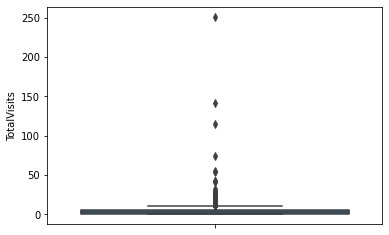

In [206]:
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [207]:
#checking percentile values for "Total Visits"

lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

As we can see, Outliers are present, We can remove top 1% to treat it

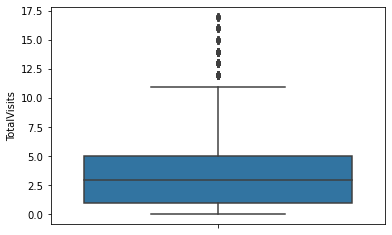

In [208]:
#Outlier Treatment: Remove top 1% of the Column Outlier values

Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

####  Total Time Spent on Website

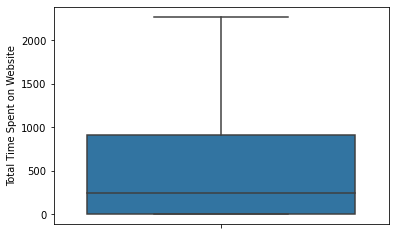

In [209]:
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['Total Time Spent on Website'])
plt.show()

There is no outlier

#### Page Views Per Visit

In [210]:
#Describe
lead_df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

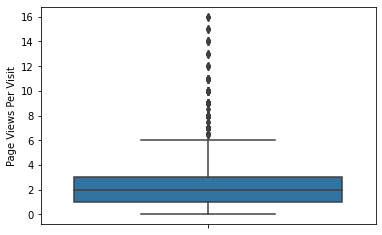

In [211]:
#Boxplot to check Outliers
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

As we can see, Outliers are present, We can remove top 1% to treat it

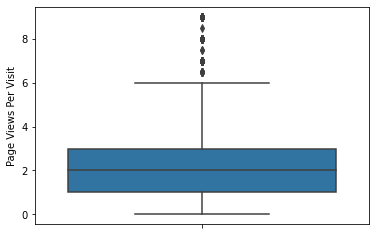

In [212]:
#Remove outliers
Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[(lead_df['Page Views Per Visit'] <= Q3)]

#Boxplot
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

Thus, All the outliers were handled.

## 3. EDA

### 3.1 Univariate Analysis 

#### Lead Origin

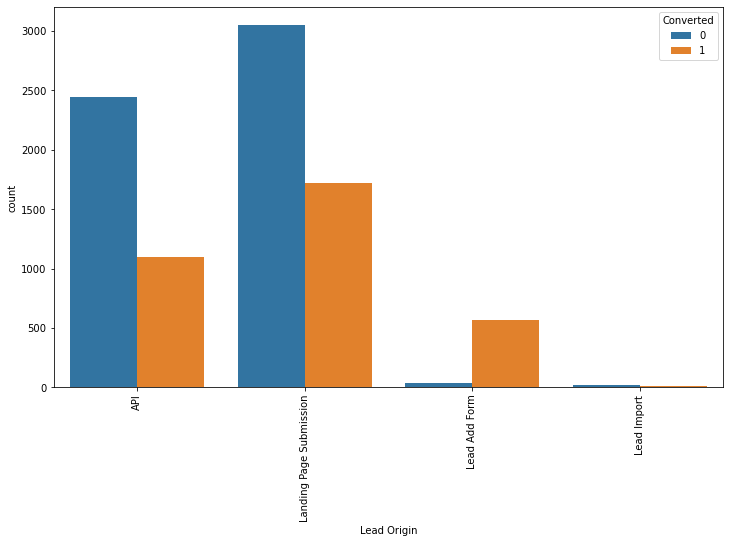

In [213]:
#Visualize lead Origin
plt.figure(figsize=(12,7))
rotating = sns.countplot(lead_df['Lead Origin'],hue=lead_df.Converted)
rotating.set_xticklabels(rotating.get_xticklabels(),rotation=90)
plt.show()

1. Lead Add Form has got highest highest conversion rate in absolute terms. i.e. more number people have converted than who were not converted.
2. Landing page submission is having highest rate of conversion relatively.
3. We can concentrate on Landing Page Submission and Lead add forms to retain hot leads and convert others too

#### Lead Source

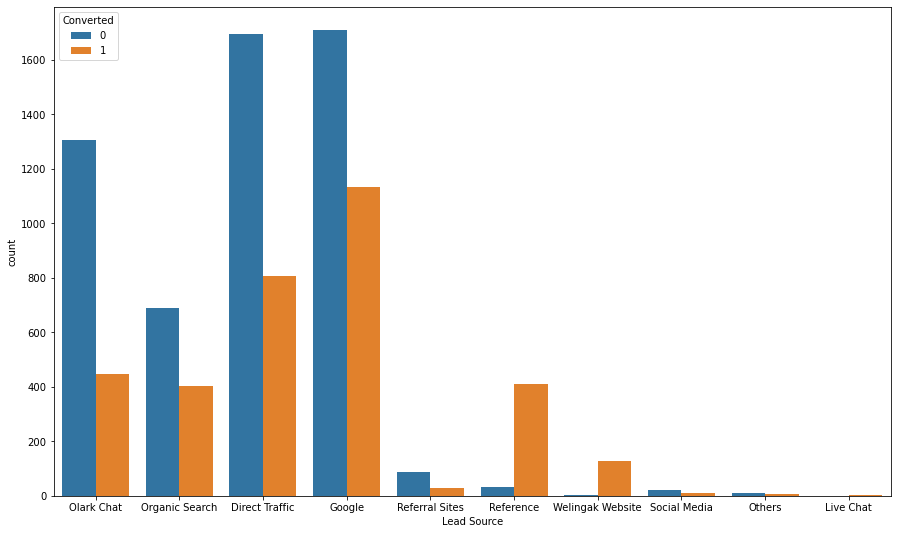

In [214]:
#Visualize Lead Source 
plt.figure(figsize=(15,9))
graph = sns.countplot(lead_df['Lead Source'],hue=lead_df.Converted)
rotating.set_xticklabels(rotating.get_xticklabels(),rotation=90)
plt.show()

1. Referncce and Welingak websites are converting leads to hot leads compared to not converted in these platforms.
2. Google and Direct traffic are getting high conversion rates relatively.
3. We can concentrate more on these platforms to convert more leads to hotleads

#### Do Not Email

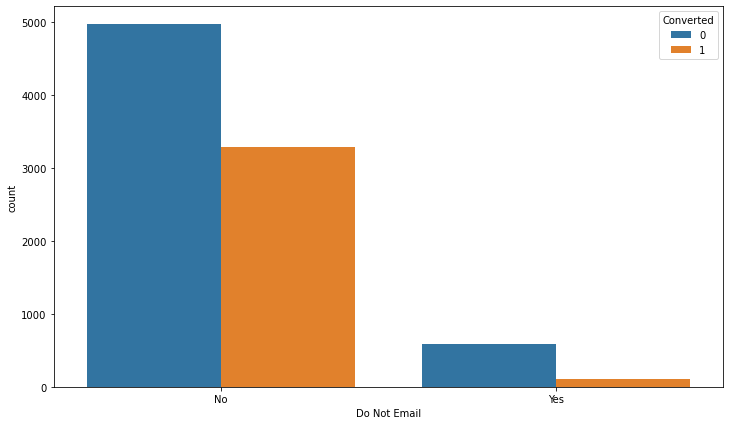

In [215]:
#Visualize
plt.figure(figsize=(12,7))
rotating = sns.countplot(lead_df['Do Not Email'],hue=lead_df.Converted)
plt.show()

Few people who have told Not to Email have also got converted. That means, Instead of dropping mail, we can use other means of communication to make them converted. The convertion rate is high for the people who have not said no to Emails.

#### TotalVisits

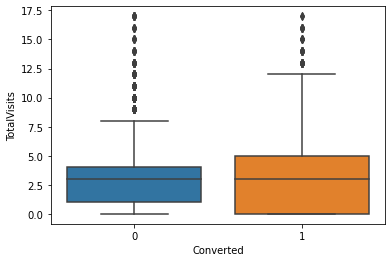

In [216]:
#Visualize
sns.boxplot(y=lead_df['TotalVisits'],x='Converted',data=lead_df)
plt.show()

Medians are same and we can not conclude anything here

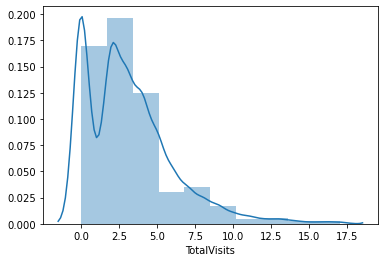

In [217]:
#distplot
sns.distplot(lead_df.TotalVisits,bins=10)
plt.show()

#### Total Time Spent on Website

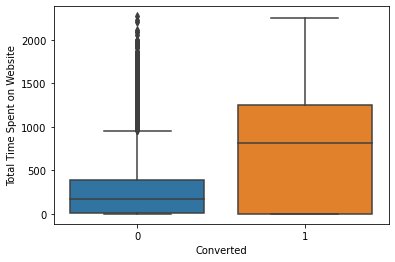

In [218]:
#Visualize
sns.boxplot(y=lead_df['Total Time Spent on Website'],x='Converted',data=lead_df)
plt.show()

Convertion rate is high for this column

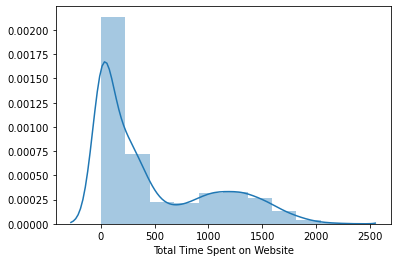

In [219]:
#distplot
sns.distplot(lead_df['Total Time Spent on Website'],bins=10)
plt.show()

#### Page Views Per Visit 

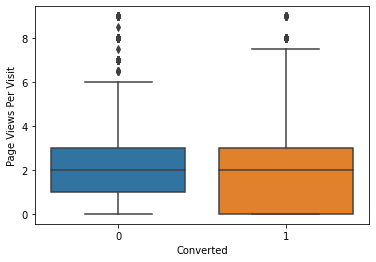

In [220]:
#Visualize
sns.boxplot(y=lead_df['Page Views Per Visit'],x='Converted',data=lead_df)
plt.show()

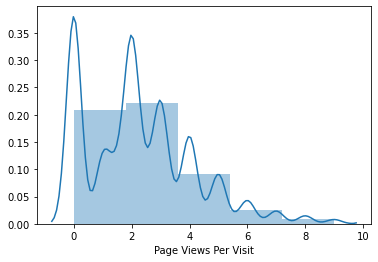

In [221]:
#distplot
sns.distplot(lead_df['Page Views Per Visit'],bins=5)
plt.show()

Medians are same and here also we can not conclude anything at this point

#### Specialization

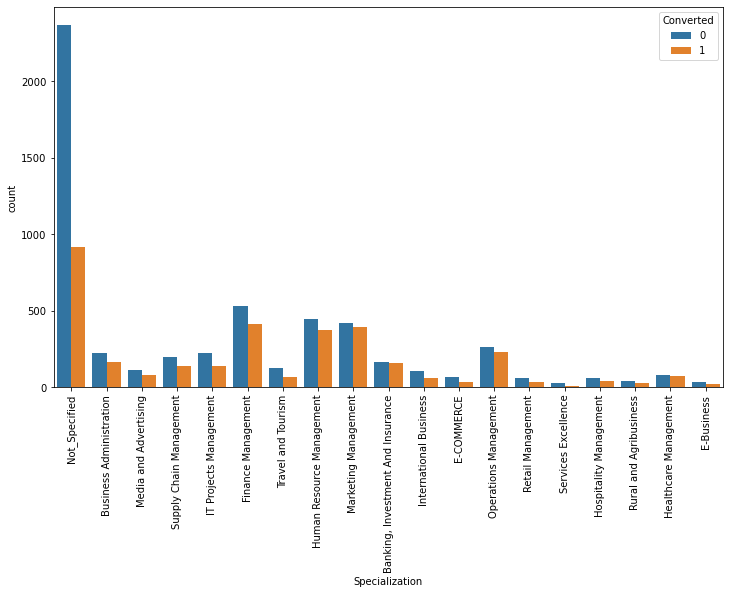

In [222]:
#Visualize
plt.figure(figsize=(12,7))
rotating = sns.countplot(lead_df['Specialization'],hue=lead_df.Converted)
rotating.set_xticklabels(rotating.get_xticklabels(),rotation=90)
plt.show()

As management has got same kind of trends, we can combine all management specializations

In [223]:
#combining Management Specializations because they show similar trends

lead_df['Specialization'] = lead_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                           'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

We can concenttrate more on Management Specialization

#### What is your current occupation

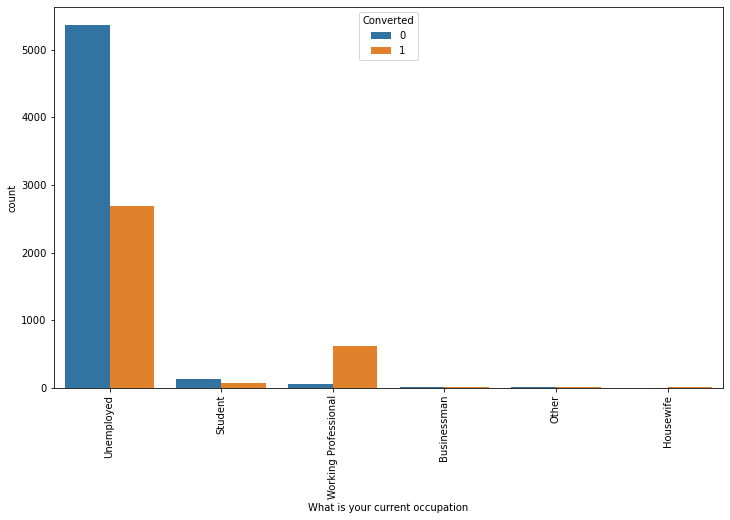

In [224]:
#Visualize
plt.figure(figsize=(12,7))
rotating = sns.countplot(lead_df['What is your current occupation'],hue=lead_df.Converted)
rotating.set_xticklabels(rotating.get_xticklabels(),rotation=90)
plt.show()

We can also combine all the attributes with less freqency

In [225]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(['Businessman',
                                                             'Student','Housewife','Other'],'Other')

Working professionals have high convertion rate, compared to not converted.
Unemployed people are converting more comparitively with other attributes.


#### City

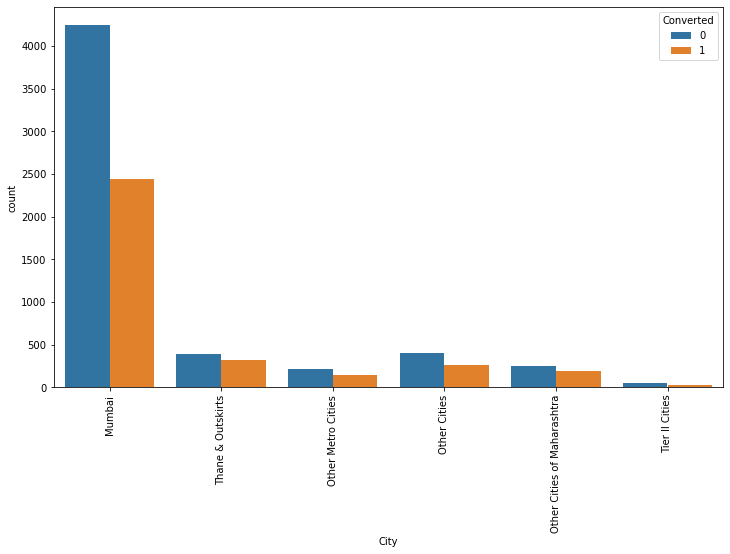

In [226]:
#Visualize
plt.figure(figsize=(12,7))
rotating = sns.countplot(lead_df['City'],hue=lead_df.Converted)
rotating.set_xticklabels(rotating.get_xticklabels(),rotation=90)
plt.show()

People from Mumbai seems to get more likely converted

#### Converted

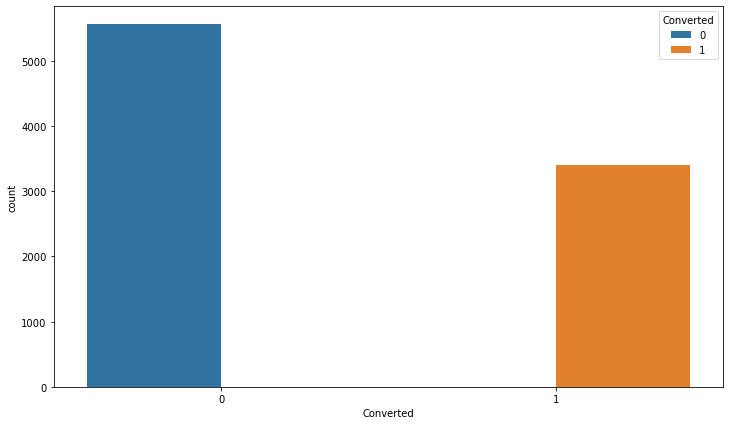

In [227]:
#Visualize
plt.figure(figsize=(12,7))
rotating = sns.countplot(lead_df['Converted'],hue=lead_df.Converted)
plt.show()

### 3.2 Bivariate Analysis

In [228]:
#Correlation
lead_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.044338,0.352502,-0.006128
TotalVisits,0.044338,1.000000,0.351449,0.721126
Total Time Spent on Website,0.352502,0.351449,1.000000,0.350523
Page Views Per Visit,-0.006128,0.721126,0.350523,1.000000


Looks like, there is no multicollinearity 

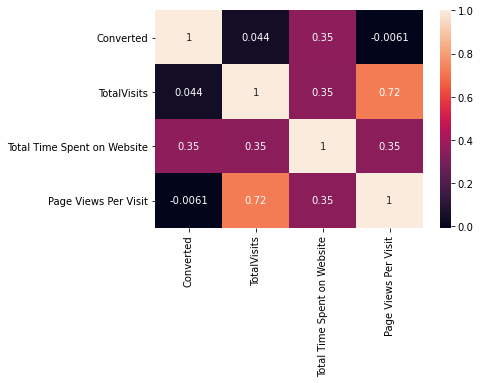

In [229]:
#Plotting heatmap
sns.heatmap(lead_df.corr(),annot=True)
plt.show()

## 4. Data Preparation

### 4.1 Dummy Variable Creation

We shall create Dummy variables and remove original categorical variables

In [230]:
#getting a list of categorical columns

categorical_columns= lead_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [231]:
# List of variables to map
variable = ['A free copy of Mastering The Interview','Do Not Email']
#map function
def bmap(x):
    return x.map({'Yes':1,'No':0})

lead_df[variable] = lead_df[variable].apply(bmap)

In [232]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lead_df = pd.concat([lead_df,dummy],1)

In [233]:
#Specialization
dummy = pd.get_dummies(lead_df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not_Specified'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [234]:
#Lead source
dummy = pd.get_dummies(lead_df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [235]:
#dropping the original columns after dummy variable creation

lead_df.drop(categorical_columns,1,inplace = True)

In [236]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,...,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0.0,0,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [237]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Unemployed            8953 non-null   uint8  
 8   What is your current occupation_Working Professional  8953

Dummy variables have got created

### 4.2 Train Test Split 

In [238]:
#Import library
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_df.drop(['Converted'], axis=1)

In [239]:
# Putting response variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [240]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [241]:
#Scaling numerical columns

#Import Standard Scaler
from sklearn.preprocessing import StandardScaler

#Create instance
scaler = StandardScaler()

#Fit and transform
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,...,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
9196,0.668862,1.848117,1.455819,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Data got scaled

We shall check the percentage of Converted

In [242]:
# Checking the Converted Rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.92025019546521

# 5. Model Building

### 5.1 RFE 

In [243]:
#Import library
import statsmodels.api as sm

In [244]:
# Import Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Import RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [245]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True, False,  True])

In [246]:
#Check ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('What is your current occupation_Unemployed', False, 7),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 11),
 ('City_Other Cities of Maharashtra', False, 10),
 ('City_Other Metro Cities', False, 12),
 ('City_Thane & Outskirts', False, 17),
 ('City_Tier II Cities', False, 13),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', False, 3),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International Business', True, 1),
 ('Specialization_Management_Specializations', True, 1),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Speciali

In [247]:
#Columns that support RFE
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website'],
      dtype='object')

In [248]:
#Columns to not to be considered
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_E-Business', 'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media'],
      dtype='object')

In [249]:
# Add sm constant and fit the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2969.0
Date:                Mon, 11 Jan 2021   Deviance:                       5938.0
Time:                        15:35:23   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4465      0.076     -5.887      0.000      -0.595      -0.298
Total Time Spent on Website                              1.0858      0.038     28.898      0.000       1.012       1.159
Lead Origin_Lead Add Form                                3.3176      0.241     13.744      0.000       2.845       3.791
What is your current occupation_Working Professional     2.7791      0.191     14.577      0.000       2.405       3.153
Specialization_Banking, Investment And Insurance         0.9887      0.179      5.525      0.000       0.638       1.339
Specialization_Business Administration                   0.5360      0.171      3.132      0.002       0.201       0.871
Specialization_E-COMMERCE                                0.7255      0.283      2.563      0.010       0.171       1.280
Specialization_International Business                    0.7852      0.231      3.400      0.001       0.333       1.238
Specialization_Management_Specializations                0.5918      0.083      7.111      0.000       0.429       0.755
Specialization_Media and Advertising                     0.4848      0.216      2.248      0.025       0.062       0.907
Specialization_Rural and Agribusiness                    0.8812      0.347      2.543      0.011       0.202       1.560
Lead Source_Direct Traffic                              -1.4808      0.120    -12.356      0.000      -1.716      -1.246
Lead Source_Google                                      -0.9555      0.108     -8.884      0.000      -1.166      -0.745
Lead Source_Organic Search                              -0.9774      0.127     -7.709      0.000      -1.226      -0.729
Lead Source_Referral Sites                              -1.4070      0.322     -4.369      0.000      -2.038      -0.776
Lead Source_Welingak Website                             2.5332      1.032      2.454      0.014       0.510       4.556
========================================================================================================================
"""

All the P-values are less than 0.05. No need to drop any attribute

### 5.2 VIF

In [250]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [251]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Management_Specializations,3.02
10,Lead Source_Direct Traffic,2.29
11,Lead Source_Google,1.84
1,Lead Origin_Lead Add Form,1.63
14,Lead Source_Welingak Website,1.34
12,Lead Source_Organic Search,1.25
2,What is your current occupation_Working Profes...,1.19
4,Specialization_Business Administration,1.18
3,"Specialization_Banking, Investment And Insurance",1.16
0,Total Time Spent on Website,1.12


VIF for all columns is less than 5, which is really good. So no need to drop any columns

### 5.3 Metric Evaluation

In [252]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.767900
4696    0.184883
3274    0.181309
2164    0.172223
1667    0.635567
7024    0.198841
8018    0.198841
778     0.168667
6942    0.198841
4440    0.155010
dtype: float64

In [253]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.76789999, 0.18488325, 0.18130947, 0.17222303, 0.63556736,
       0.19884143, 0.19884143, 0.16866695, 0.19884143, 0.15501002])

In [254]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.767900,9196
1,0,0.184883,4696
2,0,0.181309,3274
3,0,0.172223,2164
4,1,0.635567,1667


In [255]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.767900,9196,1
1,0,0.184883,4696,0
2,0,0.181309,3274,0
3,0,0.172223,2164,0
4,1,0.635567,1667,1


In [256]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3419  463]
 [ 917 1468]]


In [257]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7797989468645284


In [258]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [259]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6155136268343816

In [260]:
# Let us calculate specificity
TN / float(TN+FP)

0.8807315816589387

In [261]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.1192684183410613


In [262]:
# positive predictive value 
print (TP / float(TP+FP))

0.7602278612118073


In [263]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7885147601476015


In [264]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [265]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

#### ROC curve

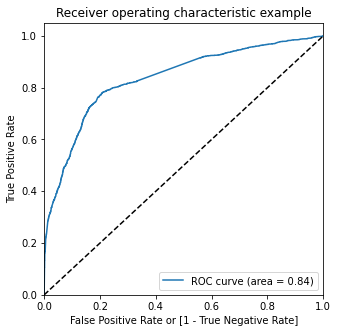

In [266]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [267]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.767900,9196,1,1,1,1,1,1,1,1,1,0,0
1,0,0.184883,4696,0,1,1,0,0,0,0,0,0,0,0
2,0,0.181309,3274,0,1,1,0,0,0,0,0,0,0,0
3,0,0.172223,2164,0,1,1,0,0,0,0,0,0,0,0
4,1,0.635567,1667,1,1,1,1,1,1,1,1,0,0,0


In [268]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.430030  0.986164  0.088357
0.2   0.2  0.727621  0.825996  0.667182
0.3   0.3  0.788735  0.766038  0.802679
0.4   0.4  0.791926  0.694340  0.851880
0.5   0.5  0.779799  0.615514  0.880732
0.6   0.6  0.765757  0.522432  0.915250
0.7   0.7  0.745173  0.415094  0.947965
0.8   0.8  0.728100  0.324528  0.976043
0.9   0.9  0.700973  0.225157  0.993302


#### Accuracy sensitivity and specificity for various probabilities curves

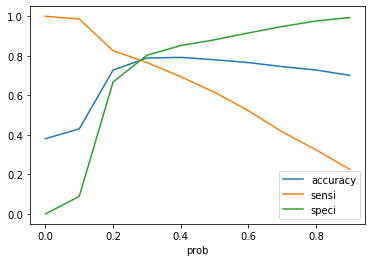

In [269]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [270]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.767900,9196,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.184883,4696,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.181309,3274,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.172223,2164,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.635567,1667,1,1,1,1,1,1,1,1,0,0,0,1


In [271]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.767900,9196,1,1,1,1,1,1,1,1,1,0,0,1,77
1,0,0.184883,4696,0,1,1,0,0,0,0,0,0,0,0,0,18
2,0,0.181309,3274,0,1,1,0,0,0,0,0,0,0,0,0,18
3,0,0.172223,2164,0,1,1,0,0,0,0,0,0,0,0,0,17
4,1,0.635567,1667,1,1,1,1,1,1,1,1,0,0,0,1,64


In [272]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [273]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7660377358490567

In [274]:
# Let us calculate specificity
TN / float(TN+FP)

0.8026790314270994

In [275]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.19732096857290057


In [276]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7045892788276128


In [277]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8481219379422972


In [278]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3419,  463],
       [ 917, 1468]], dtype=int64)

In [279]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7602278612118073

In [280]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6155136268343816

In [281]:
from sklearn.metrics import precision_score, recall_score

In [282]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.7602278612118073

In [283]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6155136268343816

In [284]:
from sklearn.metrics import precision_recall_curve

In [285]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Converted, Length: 6267, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    0
 6263    1
 6264    0
 6265    0
 6266    1
 Name: predicted, Length: 6267, dtype: int64)

In [286]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Precision Recall curve

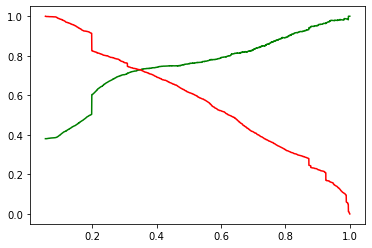

In [287]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 6. Model Evaluation

In [288]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,...,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
9196,0.668862,1.848117,1.455819,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [289]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website
7681,-0.311318,0,0,0,0,0,0,1,0,0,1,0,0,0,0
984,-0.550262,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8135,0.812462,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [290]:
X_test_sm = sm.add_constant(X_test)

In [291]:
y_test_pred = res.predict(X_test_sm)

In [292]:
y_test_pred[:10]

7681    0.157941
984     0.193147
8135    0.375396
6915    0.183491
2712    0.134746
244     0.233552
4698    0.149679
8287    0.195456
6791    0.335371
8970    0.152162
dtype: float64

In [293]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [294]:
# Let's see the head
y_pred_1.head()

,0
7681,0.157941
984,0.193147
8135,0.375396
6915,0.183491
2712,0.134746


In [295]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [296]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [297]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [298]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [299]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.157941
1,0,984,0.193147
2,0,8135,0.375396
3,0,6915,0.183491
4,1,2712,0.134746


In [300]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [301]:
# Rearranging the columns


y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

#### Note : Use 'reindex_axis' instead 'reindex' if it is Pandas < 0.21 as it throws error

In [302]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,7681,0,0.157941
1,984,0,0.193147
2,8135,0,0.375396
3,6915,0,0.183491
4,2712,1,0.134746


In [303]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [304]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,7681,0,0.157941,0
1,984,0,0.193147,0
2,8135,0,0.375396,1
3,6915,0,0.183491,0
4,2712,1,0.134746,0


In [305]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7304542069992555

In [306]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1121,  555],
       [ 169,  841]], dtype=int64)

In [307]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [308]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8326732673267326

In [309]:
# Let us calculate specificity
TN / float(TN+FP)

0.668854415274463

In [310]:
##### Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.6024355300859598

## 7. Conclusion

#### Model built with

Training: <br>
Specificity : 80.26<br>
Sensitivity : 76.60<br>
Precision : 76.02<br>
Accuracy : 77.97<br>

For Testing:<br>
Specificity : 66.88<br>
Sensitivity : 83.26<br>
Precision : 60.24<br>
Accuracy : 73.04<br>

#### Final List of Attributes to concentrate on : <br>
- Specialization_Management_Specializations
- Lead Source_Direct Traffic
- Lead Source_Google
- Lead Origin_Lead Add Form	
- Lead Source_Welingak Website	
- Lead Source_Organic Search	
- What is your current occupation_Working Professional
- Specialization_Business Administration
- Specialization_Banking, Investment And Insurance
- Total Time Spent on Website	
- Specialization_International Business	
- Specialization_Media and Advertising	
- Specialization_E-COMMERCE
- Specialization_Rural and Agribusiness
- Lead Source_Referral Sites